<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01794067-janmenc/blob/main/ActividadSemanal_7_A01794067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Maestría en Inteligencia Artificial Aplicada**

## **A01794067**
## **Jose Antonio Mendoza Castro**
## *Actividad semanal 7. Regresiones y K-Means*

## **Ciencia y analitica de datos**

## **Dra. Maria de la Paz Rico**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cluster import KMeans

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
pd.set_option('display.max_columns', None)

### **Ejercicio 1. Costo en la industria de manufactura.**

#### Divide los datos del costo de manufactura.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')

In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

#### Regresión Lineal.

In [ ]:
reg = LinearRegression(fit_intercept = True).fit(X_train, y_train)

In [ ]:
yhat = reg.predict(X_train)

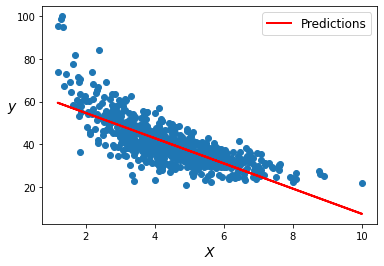

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, yhat, 'r-', linewidth = 2, label = 'Predictions')
plt.xlabel('$X$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14, rotation = 0)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
reg.intercept_, reg.coef_

(66.4916398833448, array([-5.92332061]))

Model:

$\hat{y} = 66.49 -5.92X$

In [ ]:
mae_lr = mean_absolute_error(y_train, yhat)
r2_lr = r2_score(y_train, yhat)

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, yhat)))
print('Mean Absolute Error: ', mae_lr)
print('R2: ', r2_lr)

Root Mean Squared Error:  6.725716443258154
Mean Absolute Error:  4.812236861086911
R2:  0.5756112340929229


#### Regresión Polinomial.

In [ ]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
inds = X_train.values.ravel().argsort()
X_train_tmp = np.array(X_train).ravel()[inds].reshape(-1, 1)
y_train_tmp = y_train.values[inds]

In [ ]:
X_poly = poly_features.fit_transform(X_train_tmp)

In [ ]:
reg = LinearRegression(fit_intercept = True).fit(X_poly, y_train_tmp)

In [ ]:
yhat = reg.predict(X_poly)

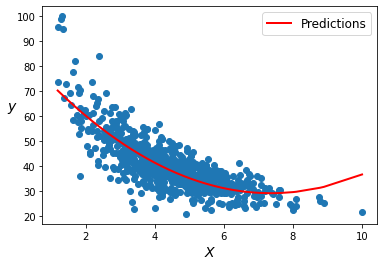

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train_tmp, yhat, 'r-', linewidth = 2, label = 'Predictions')
plt.xlabel('$X$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14, rotation = 0)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
reg.intercept_, reg.coef_

(87.6461069149089, array([-15.90719445,   1.08012324]))

Model:

$\hat{y} = 87.65 - 15.91X + 1.08X^2$

In [ ]:
mae_poly = mean_absolute_error(y_train_tmp, yhat)
r2_poly = r2_score(y_train_tmp, yhat) 

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train_tmp, yhat)))
print('Mean Absolute Error: ', mae_poly)
print('R2: ', r2_poly)

Root Mean Squared Error:  6.086269163182796
Mean Absolute Error:  4.442042336578275
R2:  0.6524725753210026


#### Realiza la regresión con Ridge y Lasso.

In [ ]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
inds = X_train.values.ravel().argsort()
X_train_tmp = np.array(X_train).ravel()[inds].reshape(-1, 1)
y_train_tmp = y_train.values[inds]

In [ ]:
X_poly = poly_features.fit_transform(X_train_tmp)

In [ ]:
ridge = Ridge(alpha = 20, solver = 'cholesky').fit(X_poly, y_train_tmp)

In [ ]:
yhat = ridge.predict(X_poly)

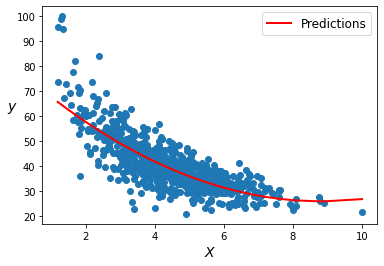

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train_tmp, yhat, 'r-', linewidth = 2, label = 'Predictions')
plt.xlabel('$X$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14, rotation = 0)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
ridge.intercept_, ridge.coef_

(79.06529672081723, array([-12.04791508,   0.68123455]))

Model:

$\hat{y} = 79.06 - 12.05X + 0.68X^2$

In [ ]:
mae_ridge = mean_absolute_error(y_train_tmp, yhat)
r2_ridge = r2_score(y_train_tmp, yhat) 

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train_tmp, yhat)))
print('Mean Absolute Error: ', mae_ridge)
print('R2: ', r2_ridge)

Root Mean Squared Error:  6.181575244053123
Mean Absolute Error:  4.440146747265844
R2:  0.6415033579589049


In [ ]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
inds = X_train.values.ravel().argsort()
X_train_tmp = np.array(X_train).ravel()[inds].reshape(-1, 1)
y_train_tmp = y_train.values[inds]

In [ ]:
X_poly = poly_features.fit_transform(X_train_tmp)

In [ ]:
lasso = Lasso(alpha = 0.5).fit(X_poly, y_train_tmp)

In [ ]:
yhat = lasso.predict(X_poly)

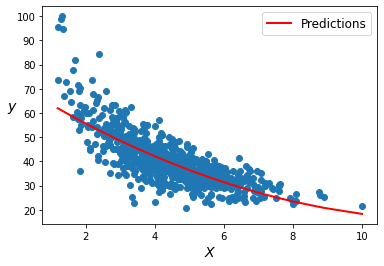

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train_tmp, yhat, 'r-', linewidth = 2, label = 'Predictions')
plt.xlabel('$X$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14, rotation = 0)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
lasso.intercept_, lasso.coef_

(72.04579173231107, array([-8.86164856,  0.34890972]))

Model:

$\hat{y} = 72.04 - 8.86X + 0.35X^2$

In [ ]:
mae_lasso = mean_absolute_error(y_train_tmp, yhat)
r2_lasso = r2_score(y_train_tmp, yhat) 

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train_tmp, yhat)))
print('Mean Absolute Error: ', mae_lasso)
print('R2: ', r2_lasso)

Root Mean Squared Error:  6.398518807711033
Mean Absolute Error:  4.558017977900074
R2:  0.6158987913031713


#### Gráfico MAE y R2. 

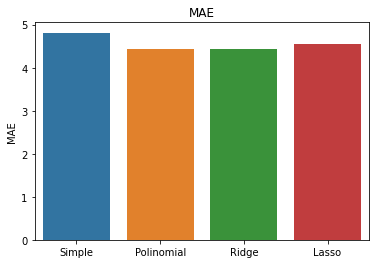

In [ ]:
sns.barplot(x = ['Simple', 'Polinomial', 'Ridge', 'Lasso'], y = [mae_lr, mae_poly, mae_ridge, mae_lasso]).set(title = 'MAE', ylabel = 'MAE')
plt.show()

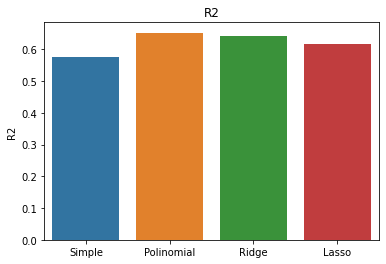

In [ ]:
sns.barplot(x = ['Simple', 'Polinomial', 'Ridge', 'Lasso'], y = [r2_lr, r2_poly, r2_ridge, r2_lasso]).set(title = 'R2', ylabel = 'R2')
plt.show()

#### Conclusiones.

En este caso el método que conviene más a la empresa sería el polinomial con grado igual a dos, debido a que fue le modelo que presentó el error más bajo y la R2 más alta. Aunque habría que explorar más los resultados y experimentar más. El porcentaje de datos para prueba se elegió al 20%, dado el tamaño total de la base que es de 1000 datos. El MAE es de 4.4 y la R2 de 0.65, en terminos relativos es el mejor resultado entre los cuatro modelos, pero es mejorable con experimentación.


### **Ejercicio 2. Regresión Múltiple.**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop(columns = ['id', 'date', 'zipcode', 'lat', 'long'], inplace = True)

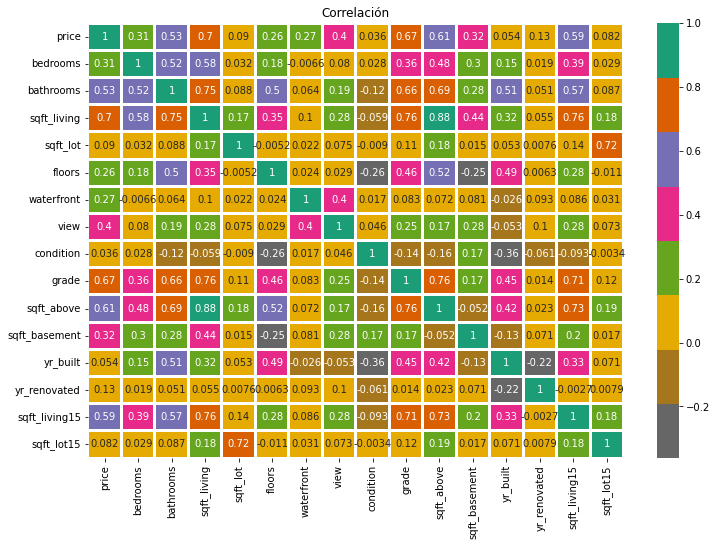

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2).set(title = 'Correlación')
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

#### División de los datos.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


#### Regresión Múltiple Lineal.

In [ ]:
reg = LinearRegression(fit_intercept = True).fit(X_train, y_train)

In [ ]:
reg.intercept_, reg.coef_

(array([6151359.2627409]),
 array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]))

$\hat{y} = 6151359.26 - 3.82x_{1} + 4.15x_{2} + 1.08x_{3} + 1.71x_{4} + 3.17x_{5} + 5.53x_{6} + 4.12x_{7} + 2.12x_{8} + 1.19x_{9} + 4.77x_{10} + 6.02x_{11} - 3.55x_{12} + 1.33x_{13} + 2.90x_{14} - 5.48x_{15} $

In [ ]:
yhat = reg.predict(X_test)

In [ ]:
mae_lr = mean_absolute_error(y_test, yhat)
r2_lr = r2_score(y_test, yhat) 

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, yhat)))
print('Mean Absolute Error: ', mae_lr)
print('R2: ', r2_lr)

Root Mean Squared Error:  232133.3676240749
Mean Absolute Error:  137480.1388273178
R2:  0.6579723205007814


#### Regresión Múltiple Polinomial.

In [ ]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
X_poly = poly_features.fit_transform(X_train)

In [ ]:
reg = LinearRegression(fit_intercept = True).fit(X_poly, y_train)

In [ ]:
reg.intercept_, reg.coef_

(array([80227028.3104757]),
 array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.

In [ ]:
yhat = reg.predict(X_poly)

In [ ]:
mae_poly = mean_absolute_error(y_train, yhat)
r2_poly = r2_score(y_train, yhat) 

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, yhat)))
print('Mean Absolute Error: ', mae_poly)
print('R2: ', r2_poly)

Root Mean Squared Error:  182926.52904652644
Mean Absolute Error:  123190.80861039193
R2:  0.7469519325162244


####  Regresión con Ridge y Lasso.

In [ ]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
X_poly = poly_features.fit_transform(X_train)

In [ ]:
ridge = Ridge(alpha = 20, solver = 'cholesky').fit(X_poly, y_train)

In [ ]:
ridge.intercept_, ridge.coef_

(array([92396471.54644926]),
 array([[ 4.93499168e+04, -1.60624756e+04, -2.65414668e+02,
         -2.88914458e+01, -2.20561309e+04, -5.75993606e+03,
         -3.03602664e+04,  2.69354351e+04,  3.89927313e+04,
         -2.81387029e+02,  1.00192456e+01, -9.50781494e+04,
         -3.29040344e+03,  4.27699914e+03, -3.35452340e+01,
          8.93220492e+02,  4.36381404e+02, -7.98426056e+00,
         -1.92963048e-02,  3.96211327e+03, -1.62875880e+04,
         -1.99113442e+02, -5.83956275e+02, -5.77388290e+03,
         -3.23224877e+00, -1.48086859e+01, -1.41506168e+01,
         -1.25323371e+00,  1.42073990e+01,  1.82108937e-01,
         -3.10590102e+03,  1.32388732e+01, -1.36529547e-01,
         -1.27217700e+04,  3.35017261e+04,  5.13460027e+03,
         -1.10699043e+04,  1.44280251e+04,  1.63632996e+01,
          2.90885079e+00, -1.55784671e+01, -2.69530879e+01,
         -9.70018014e+00, -1.86047238e-02,  3.93617667e+00,
          2.89537844e+00,  1.47529036e+00,  1.56480216e+02,
         -1

In [ ]:
yhat = ridge.predict(X_poly)

In [ ]:
mae_ridge = mean_absolute_error(y_train, yhat)
r2_ridge = r2_score(y_train, yhat) 

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, yhat)))
print('Mean Absolute Error: ', mae_ridge)
print('R2: ', r2_ridge)

Root Mean Squared Error:  183554.6012248883
Mean Absolute Error:  123652.37462549294
R2:  0.7452112850939214


In [ ]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
X_poly = poly_features.fit_transform(X_train)

In [ ]:
lasso = Lasso(alpha = 0.5, tol = 2, max_iter = 10000).fit(X_poly, y_train)

In [ ]:
lasso.intercept_, lasso.coef_

(array([5013866.03409071]),
 array([ 1.19318332e+05,  1.71469745e+05,  9.97630448e+01,  4.84988124e-02,
        -4.47378897e+04,  9.11951416e+05,  6.82193009e+04,  3.64392525e+04,
         3.43908742e+04, -3.96091832e+01, -7.26228000e+01, -2.63576147e+03,
         1.60234425e+01,  5.87489034e+01, -3.26603054e-01, -8.56062949e+03,
        -5.93703487e+03,  6.65444990e+00, -4.04544008e-02, -1.80173332e+03,
        -6.51891792e+04,  9.28977379e+01, -9.69738275e+03,  2.41463429e+03,
         2.25012121e+00,  5.21438151e-01, -2.22899713e+01,  3.93040796e+00,
         5.71558761e+00, -3.75066792e-02, -1.05690999e+02,  5.88769136e+00,
        -2.22296681e-02, -3.35406976e+03,  1.48192039e+03, -1.20592155e+03,
        -7.13567503e+03,  1.73859153e+03,  1.80444201e+00,  5.88788658e+00,
        -2.13536726e+01,  2.28499745e+00,  3.95250570e+00, -6.82412633e-03,
         5.30865412e-03, -3.07055008e-05,  1.23090880e+00,  1.64744644e+01,
        -2.72275327e+00, -1.01882222e+00,  3.22625588e-01,  

In [ ]:
yhat = lasso.predict(X_poly)

In [ ]:
mae_lasso = mean_absolute_error(y_train, yhat)
r2_lasso = r2_score(y_train, yhat) 

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, yhat)))
print('Mean Absolute Error: ', mae_lasso)
print('R2: ', r2_lasso)

Root Mean Squared Error:  219103.379721319
Mean Absolute Error:  141782.7449724672
R2:  0.6369655906261588


#### Gráfico MAE y R2. 

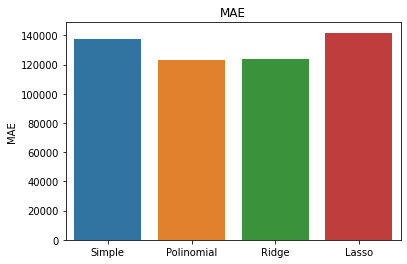

In [ ]:
sns.barplot(x = ['Simple', 'Polinomial', 'Ridge', 'Lasso'], y = [mae_lr, mae_poly, mae_ridge, mae_lasso]).set(title = 'MAE', ylabel = 'MAE')
plt.show()

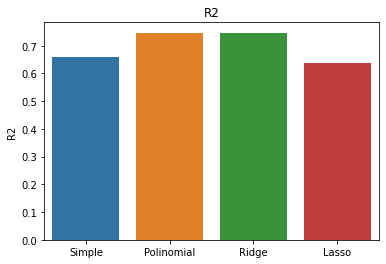

In [ ]:
sns.barplot(x = ['Simple', 'Polinomial', 'Ridge', 'Lasso'], y = [r2_lr, r2_poly, r2_ridge, r2_lasso]).set(title = 'R2', ylabel = 'R2')
plt.show()

#### Conclusiones

De acuerdo con los resultados obtenidos a partir de esta primer experimentación el mejor modelo es polinomial. Con un MAE de cerca de 120,000 y una R2 de 0.75 podríamos considerarlo como un primer modelo aceptable. Por otra parte habría que inspeccionar más la relación entre las variables para elegir mejor las variables que expliquen mejor a la variable precio.

### **Ejercicio 3. K-Means.**

#### Exploración de datos

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 26.7 MB/s 
     |████████████████████████████████| 1.0 MB 64.4 MB/s 
     |████████████████████████████████| 1.7 MB 76.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 71.8 MB/s 
     |████████████████████████████████| 6.3 MB 46.1 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=53162ff83dc0d22c37c6d73e2696cdeb6f67eefc0a5f35626033f4a8c8bfca07
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=511c6152d9cd438db914ad0aa0bea7b306addf130092338bf784704a1b0bd3cc
  Stored in directory: /root/

In [ ]:
url = "https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"

df = pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [ ]:
latlong = df[["latitude", "longitude"]]

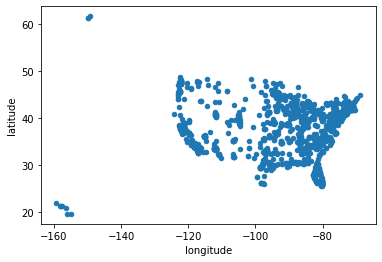

In [ ]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [ ]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

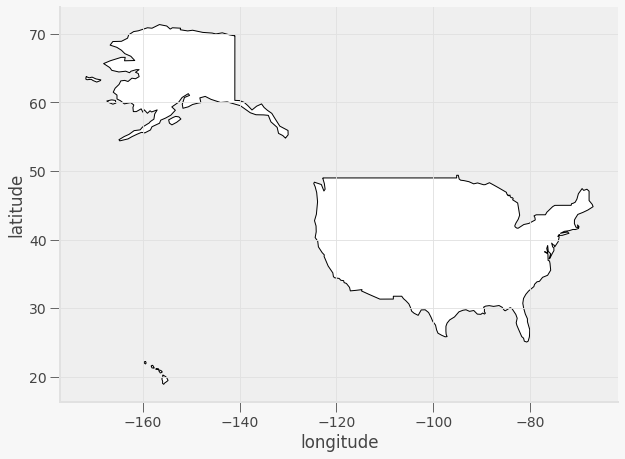

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

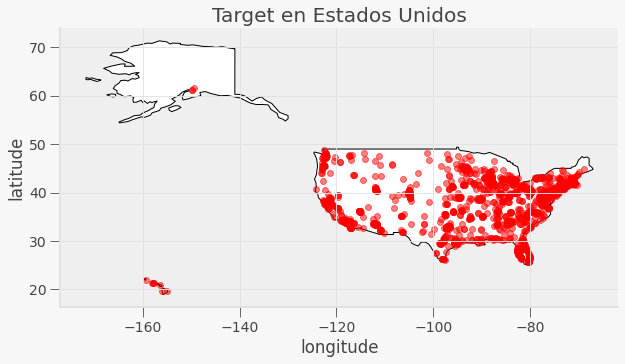

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


#### Encuentra el numero ideal de almacenes, justifica tu respuesta:

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = df[['latitude', 'longitude']]

Text(0.5, 1.0, 'Elbow curve')

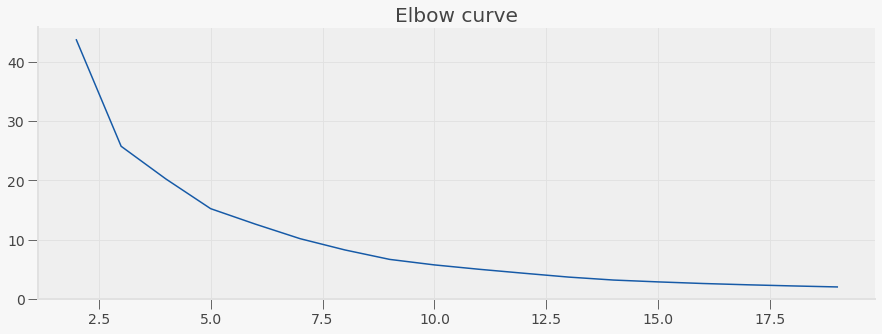

In [ ]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaler.fit_transform(X))
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
pipe = Pipeline(steps = [('mm', MinMaxScaler()), ('kmeans', KMeans(n_clusters = 5))])

In [ ]:
pipe.fit(X)

Pipeline(steps=[('mm', MinMaxScaler()), ('kmeans', KMeans(n_clusters=5))])

In [ ]:
cluster = pipe.predict(X)

In [ ]:
df['cluster'] = cluster

In [ ]:
#Número de direcciones por cluster
df.groupby('cluster')['address'].count()

cluster
0    588
1    303
2    462
3    405
4     81
Name: address, dtype: int64

En este caso se utilizó la curva de Elbow como primer aproximación al problema. A partir de la gráfica obtenida se elegió 5 almacenes. En cuestion a las distancias se podrían empezar a explorar más los resultados obteniendo las medias de la longitud y la latitud.

¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

El número se elegio a partir de la curva de Elbow.

#### Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?

En este caso podemos usar las recomendadas en el Notebook de la clase como geopandas.

¿Consideras importante que se grafique en un mapa?, ¿por qué?

Sí porqué con ello nos permitiría verificar si los resultados de la clusterización hacen sentido al negocio.